In [163]:
import numpy as np
cones = [
    [1.85844328, -19.33753632, 3.0, 0.7061382],
    [2.12849187, -17.45331111, 3.0, 0.76776551],
    [2.57394494, -15.60371869, 3.0, 0.74499976],
    [3.19079674, -13.80215222, 3.0, 0.74794124],
    [3.97023274, -12.07025125, 3.0, 0.81150282],
    [4.90804474, -10.41376764, 3.0, 0.82671902],
    [5.66088872, -8.72349226, 3.0, 0.72426541],
    [5.90833204, -6.88947401, 3.0, 0.87854583],
    [5.62830519, -5.06024729, 3.0, 0.84320715],
    [4.84203383, -3.38617496, 3.0, 0.7643888],
    [3.61895913, -1.99763497, 3.0, 0.72241595],
    [2.05360777, -1.01244862, 3.0, 0.88866094],
    [0.2728444, -0.50806865, 3.0, 0.8863489],
    [7.06087551, -18.28892629, 2.0, 0.89996013],
    [7.5407376, -16.47182176, 2.0, 0.73041819],
    [8.23677964, -14.72582811, 2.0, 0.85831636],
    [9.13972114, -13.07675034, 2.0, 0.71911304],
    [10.0160143, -11.3905207, 2.0, 0.76502316],
    [10.60168947, -9.58448286,2.0, 0.70826409],
    [10.88316488, -7.7071674, 2.0, 0.81210634],
    [10.85028075, -5.80653857, 2.0, 0.81692991],
    [10.50717653, -3.93892093, 2.0, 0.82639325],
    [9.85869466, -2.15350451, 2.0, 0.71564905],
    [8.92780575, -0.50021769, 2.0, 0.70619499],
    [7.73517194, 0.9796313, 2.0, 0.88614058],
    [6.3165248, 2.24270765, 2.0, 0.82546622],
    [4.70903561, 3.2544351, 2.0, 0.79764269],
    [2.95688792, 3.9881141, 2.0, 0.88575413],
    [1.11003903, 4.4238484, 2.0, 0.82517468],
]
cones = np.array(cones)[13:] #to 13 blue and the rest are yellow

In [164]:
from cones_sorting.cone_sorting_wrapper import ConeSortingInput, ConeSorting
from cones_sorting.core_cone_sorter import ConeSorter
from cone_matching.core_cone_matching import ConeMatching, ConeMatchingInput
from calculate_path.core_calculate_path import CalculatePath, PathCalculationInput
from utils.cone_types import ConeTypes
from utils.math_utils import angleToVector

In [165]:
cones_input = [np.zeros((0, 2)) for _ in ConeTypes]
for cone in cones:
    if cone[2] == 3:
        cones_input[ConeTypes.BLUE] = np.vstack((cones_input[ConeTypes.BLUE], cone[:2]))
    elif cone[2] == 2:
        cones_input[ConeTypes.YELLOW] = np.vstack((cones_input[ConeTypes.YELLOW], cone[:2]))
    else:
        cones_input[ConeTypes.UNKNOWN] = np.vstack((cones_input[ConeTypes.UNKNOWN], cone[:2]))

carPosition = np.array([0, -20])
carDirection = 1.5
carDirectionVec = angleToVector(carDirection)


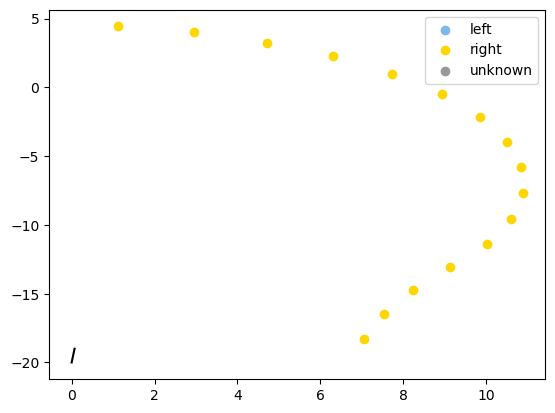

In [166]:
import matplotlib.pyplot as plt
plt.scatter(cones_input[ConeTypes.BLUE][:,0], cones_input[ConeTypes.BLUE][:,1], c="#7CB9E8", label="left")
plt.scatter(cones_input[ConeTypes.YELLOW][:,0], cones_input[ConeTypes.YELLOW][:, 1], c="gold", label="right")
plt.scatter(cones_input[ConeTypes.UNKNOWN][:,0], cones_input[ConeTypes.UNKNOWN][:, 1], c="#999999", label="unknown")
plt.legend()
plt.plot(
    [carPosition[0], carPosition[0] + carDirectionVec[0]],
    [carPosition[1], carPosition[1] + carDirectionVec[1]],
    c="k",
)

In [167]:
coneSorting = ConeSorting(
    maxNNeighbors=5,
    maxDist=6.5,
    maxDistToFirst=10,
    maxLength=12, #default=12
    thresholdDirectionalAngle=np.deg2rad(40),
    thresholdAbsoluteAngle=np.deg2rad(65),
    useUnknownCones=True,
)
coneSortingInput = ConeSortingInput(
    cones_input, carPosition, carDirection
) 
coneSorting.setNewInput(coneSortingInput)
sortedLeft, sortedRight = coneSorting.runConeSorting()

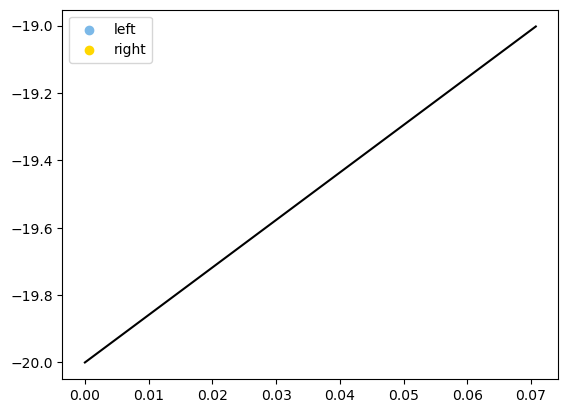

In [168]:
plt.scatter(sortedLeft[:,0], sortedLeft[:,1], c="#7CB9E8", label="left")
plt.scatter(sortedRight[:,0], sortedRight[:, 1], c="gold", label="right")
plt.legend()
plt.plot(
    [carPosition[0], carPosition[0] + carDirectionVec[0]],
    [carPosition[1], carPosition[1] + carDirectionVec[1]],
    c="k",
)